#importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
#from sklearn import preprocessing



#reading the data


In [ ]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [ ]:
train_dataset

#statistical info

In [ ]:
train_dataset.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

##Knowing number of  null values present in the each column

In [ ]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#ploting the null values using seaborn 

In [ ]:
sns.heatmap(train_dataset.isnull(),
            xticklabels = True,
            yticklabels = False,
            cmap = "YlGnBu")

###Ploting for clear understating

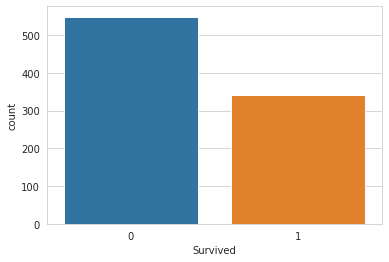

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_dataset)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',
              hue = 'Sex',
              data=train_dataset)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue ='Pclass',data=train_dataset)

In [ ]:
sns.scatterplot( x="Age", 
                y='Pclass',
                data=train_dataset,
                hue='Sex')

##Droping and replacing values

In [ ]:
#Cabin and Ticket values do not make an impact to the output
train_dataset.drop(['Cabin','Ticket'],
                   axis = 1,
                   inplace = True) 

In [ ]:
train_dataset

In [ ]:
sns.heatmap(train_dataset.isnull(),
            xticklabels = True,
            yticklabels = False,cmap = "YlGnBu")

In [ ]:
sns.histplot(x='Age', data=train_dataset, )
plt.show()

#people above age 60 are less

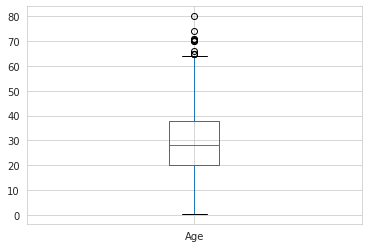

In [ ]:
train_dataset.boxplot(column=['Age'])
plt.show()

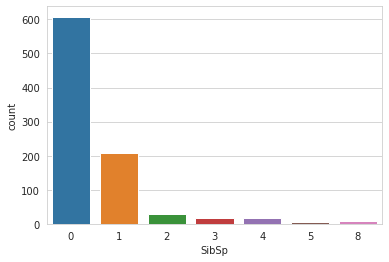

In [ ]:
sns.countplot(x='SibSp',data=train_dataset)

#Handling the Null values

In [ ]:
age_replace = train_dataset['Age'].median()
age_replace

28.0

In [ ]:
train_dataset['Age'] = train_dataset['Age'].fillna(value = 28)


In [ ]:
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [ ]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [ ]:
train_dataset['Person'] = train_dataset[['Age', 'Sex']].apply(male_female_child, axis=1)
train_dataset.head(50)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   
30           31         0       1   
31           32         1       1   
32           33         1       3   
33           34         0       2   
34           35         0       1   
35           36         0       1   
36           37         1       3   
37           38         0       3   
38           39         0       3   
39           40         1       3   
40           41         0       3   
41           42         0       2   
42           43         0       3   
43           44         1       2   
44           45         1       3   
45           46         0       3   
46           47         0       3   
47           48         1       3   
48           49         0       3   
49           50         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male  28.0      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male  28.0      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female  28.0      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
24                      Palsson, Miss. Torborg Danira  female   8.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26        

In [ ]:
train_dataset.drop('Fare',axis=1,inplace=True)



In [ ]:
label_encoder = preprocessing.LabelEncoder() 
train_dataset["Embarked"] = label_encoder.fit_transform(train_dataset["Embarked"])
train_dataset


## Number of passengers from each city



In [ ]:
train_dataset.groupby('Embarked')['Embarked'].count()

Embarked
0    168
1     77
2    644
3      2
Name: Embarked, dtype: int64

###Handling null values in Embarked

In [ ]:
train_dataset["Embarked"] = train_dataset["Embarked"].fillna(value = "S") 

In [ ]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         0
dtype: int64

In [ ]:
train_dataset


In [ ]:
train_dataset

In [ ]:
le = preprocessing.LabelEncoder() #
train_dataset["Sex"] = le.fit_transform(train_dataset["Sex"])
train_dataset

In [ ]:
correlation = train_dataset.corr()

In [ ]:
sns.heatmap(correlation,
            xticklabels =correlation.columns,
            yticklabels = correlation.columns,annot = True )